In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard

<h1>Introduction To Deep Learning - Deep Models</h1>

In [3]:
(attributes_train, labels_train), (attributes_test, labels_test) = mnist.load_data()

In [4]:
attributes_train.shape, labels_train.shape, attributes_test.shape, labels_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

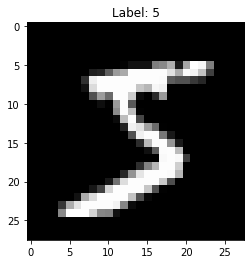

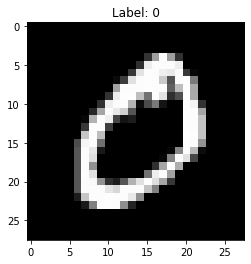

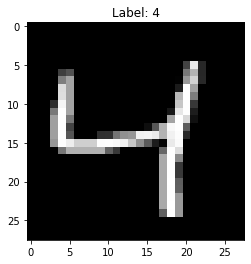

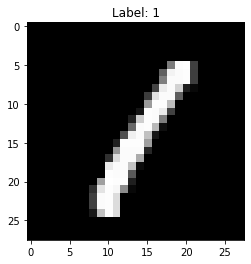

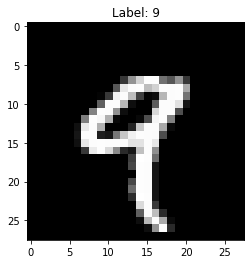

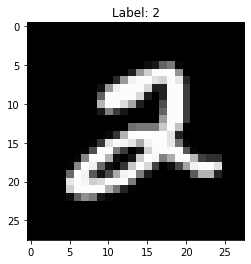

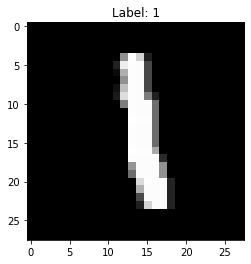

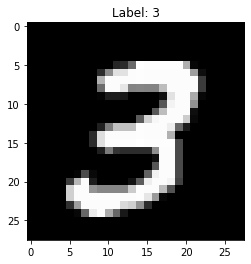

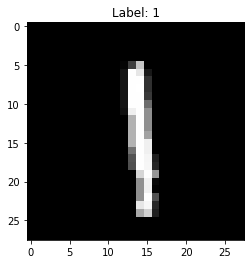

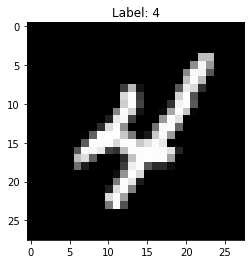

In [5]:
for i in range(10):
    plt.imshow(attributes_train[i], cmap="gray")
    plt.title(f"Label: {labels_train[i]}")
    plt.show()

In [6]:
set(labels_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

In [8]:
attributes_train.min(), attributes_train.max()

(0.0, 1.0)

In [9]:
attributes_val, labels_val = attributes_test[:5000], labels_test[:5000]
attributes_test, labels_test = attributes_test[5000:], labels_test[5000:]

In [10]:
attributes_val.shape, labels_val.shape

((5000, 28, 28), (5000,))

In [11]:
tf.keras.backend.clear_session()

In [12]:
model = Sequential([
    Input(shape = (28, 28)),
    Flatten(),
    
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dropout(0.1),
    Dense(16, activation="relu"),
    Dropout(0.1),
    
    Dense(10, activation="softmax"),  
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

In [14]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [15]:
model.fit(
    attributes_train, 
    labels_train, 
    validation_data = (attributes_val, labels_val),
    epochs = 20, 
    callbacks=[TensorBoard(log_dir = "./logs_nn")]
)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4971 - accuracy: 0.8490 - val_loss: 0.2538 - val_accuracy: 0.9272
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2450 - accuracy: 0.9312 - val_loss: 0.1849 - val_accuracy: 0.9478
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1927 - accuracy: 0.9459 - val_loss: 0.1628 - val_accuracy: 0.9524
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1616 - accuracy: 0.9543 - val_loss: 0.1472 - val_accuracy: 0.9560
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1427 - accuracy: 0.9598 - val_loss: 0.1332 - val_accuracy: 0.9612
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1305 - accuracy: 0.9638 - val_loss: 0.1358 - val_accuracy: 0.9602
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1206 - accuracy: 0.9657 - val_loss: 0.1432 - val_ac

In [16]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.03269951,  0.00122045, -0.06609663, ...,  0.0810172 ,
          0.04876567,  0.05119915],
        [ 0.0797589 , -0.02179804, -0.03601457, ..., -0.05223413,
          0.05406373, -0.0702088 ],
        [-0.06615222,  0.00365549, -0.04524935, ...,  0.022394  ,
          0.05656382,  0.05091735],
        ...,
        [ 0.01039647, -0.00615658,  0.06578331, ..., -0.0310979 ,
          0.06731773,  0.06392852],
        [ 0.01287332, -0.00572854,  0.06256709, ..., -0.03307752,
          0.02615975, -0.00089715],
        [ 0.00983875, -0.05695847, -0.07821053, ..., -0.03826465,
         -0.00414208, -0.07157911]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.15188931, -0.24918506, -0.12432446, -0.16598447, -0.05308321,
        -0.20934185,  0.21812055, -0.32740092,  0.11306289, -0.01682796,
         0.14832129, -0.05425752, -0.20057605,  0.10285997,  0.30932716,
      